In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import math
import time
import numpy as np
import torch
from src import helpers

In [2]:
n = 10_000
a = torch.ones(n)
b = torch.ones(n)


In [3]:
c = torch.zeros(n)
timer = helpers.Timer()
for i in range(n):
    c[i] = a[i]+b[i]
print(f"took {timer.stop():.5f} seconds")

took 0.05196 seconds


In [4]:
timer.start()
d = a+b
print(f"took {timer.stop():.5f} seconds")

took 0.00022 seconds


In [5]:
## NORMAL Distribution
## Linear Regression & Normal Distr. (aka Gaussian distr.) was both invented by Gauss in 1795

def normal(x, mu, sigma):
    p = 1 / math.sqrt(2*math.pi*sigma**2)
    return p * np.exp(-((x-mu)**2)/(2*sigma**2))

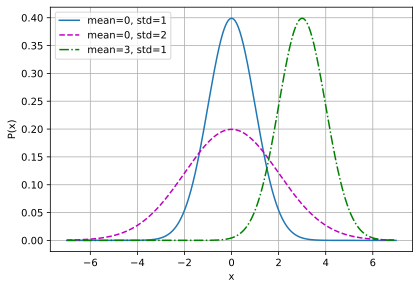

In [6]:
## use numpy for visualization
x = np.arange(-7, 7, 0.01)

## mean and std pairs
params = [(0,1), (0,2), (3,1)]
helpers.plot(
    x, 
    [normal(x, mu, sigma) for mu, sigma in params],
    xlabel="x",
    ylabel="P(x)",
    figsize=(6.5, 4.5),
    legend=[f"mean={mu}, std={sigma}" for mu, sigma in params]
)



## Linear Regression from SCRATH

In [7]:
%matplotlib inline
import random
import torch


In [8]:
## GOLD values
gold_w = torch.tensor([2, 3.4])
gold_b = 4.2
gold_mu = 0.0
gold_sigma = 0.01
num_examples = 10_000

In [9]:
features, labels = helpers.synthetic_data(gold_w, gold_b, num_examples)

In [10]:
features.shape, labels.shape

(torch.Size([10000, 2]), torch.Size([10000, 1]))

In [11]:
features[:4, :]

tensor([[-0.5211,  0.3978],
        [-0.2299,  0.9398],
        [ 0.7359,  0.7903],
        [-0.4398, -0.0663]])

In [12]:
labels[:4]

tensor([[4.4911],
        [6.9343],
        [8.3534],
        [3.1026]])

In [13]:
helpers.set_figsize()

In [14]:
features[:, (1)].shape

torch.Size([10000])

In [15]:
features[:].shape

torch.Size([10000, 2])

In [16]:
features[:4, (1)]

tensor([ 0.3978,  0.9398,  0.7903, -0.0663])

In [17]:
features[:4]

tensor([[-0.5211,  0.3978],
        [-0.2299,  0.9398],
        [ 0.7359,  0.7903],
        [-0.4398, -0.0663]])

In [18]:
features[:4, 1]

tensor([ 0.3978,  0.9398,  0.7903, -0.0663])

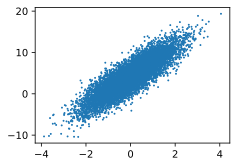

In [19]:
plt.scatter(
    features[:, 1].detach().numpy(),
    labels.detach().numpy(),
    s=1,     ## size of the marker
)

In [20]:
helpers.data_iter??

Signature: helpers.data_iter(batch_size, features, labels)
Source:   
def data_iter(batch_size, features, labels):
    """Iterate through the whole dataset consisting of (features, labels) with batch-wise random smapling"""
    num_examples = len(features)
    idxs = list(range(num_examples))
    ## randomly sample from the indices
    random.shuffle(idxs)
    for i in range(0, num_examples, batch_size):
        batch_idxs = torch.tensor(idxs[i : min(i + batch_size, num_examples)])
        yield features[batch_idxs], labels[batch_idxs]
File:      ~/Desktop/flashAI/sutram/d2l/src/helpers.py
Type:      function


In [21]:
bs = 10
for X, Y in helpers.data_iter(bs, features, labels):
    print(f"{X}\n\n{Y}")
    print("--"*20)
    break

tensor([[-0.6663, -1.1503],
        [ 1.1307,  0.4789],
        [-0.0943, -0.0949],
        [ 0.3578, -0.9760],
        [-1.2104,  0.0942],
        [ 0.4068, -2.9806],
        [ 0.7071,  0.8858],
        [ 0.0620,  0.5803],
        [-0.9695, -1.2137],
        [ 0.3856, -0.3097]])

tensor([[-1.0309],
        [ 8.0867],
        [ 3.6911],
        [ 1.5889],
        [ 2.0861],
        [-5.1343],
        [ 8.6158],
        [ 6.2875],
        [-1.8629],
        [ 3.9081]])
----------------------------------------


In [40]:
## Initializing model parameters

w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)


In [41]:
## Hyperparams & Model

lr = 0.03
num_epochs = 3
model = helpers.linear_regression
loss_fn = helpers.squared_loss

## Training loop

for epoch in range(num_epochs):
    for xb, yb in helpers.data_iter(bs, features[:1000], labels[:1000]):
        preds = model(xb, w, b)     ## forward pass
        loss = loss_fn(preds, yb)   ## compute the loss
        loss.sum().backward()       ## calculate the gradients
        helpers.sgd([w, b], lr, bs) ## optimizer

    with torch.no_grad():
        preds = model(features, w, b)
        train_loss = loss_fn(preds, labels)
        print(f"epoch = {epoch+1}/{num_epochs}: loss = {train_loss.mean():f}")
        # print(w, b)

epoch = 1/3: loss = 0.067677
epoch = 2/3: loss = 0.000396
epoch = 3/3: loss = 0.000053
